#### Scrape new images off of live-webcam services

In [8]:
%matplotlib inline
import os
import time
import cv2
import base64
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests as req
import datetime as dt

In [2]:
URL1 = 'https://www.vegvesen.no/public/webkamera/kamera?id=2986247' # E39 Auglend Sør
URL2 = 'https://www.vegvesen.no/public/webkamera/kamera?id=2992499' # E39 Auglend Nord
IMG_HTBL = set() # Store image hashes here so we do not re-save the same images over and over again.

In [16]:
def show_image(img):
    plt.figure(figsize=(12,8))
    ax = plt.subplot(111)
    plt.imshow(img)
    plt.xticks([]),plt.yticks([])
    ax.axis("off")
    plt.tight_layout()
    plt.show()

def get_image(prefix, url):    
    r = req.get(url)
    if r.status_code != 200: # Is the camera down?
        return None
    
    h = hash(str(r.content))
    if h in IMG_HTBL: # Don't process the same image twice.
        return None
    
    IMG_HTBL.add(h)
    img = cv2.imdecode(np.frombuffer(r.content, dtype=np.uint8), cv2.IMREAD_COLOR)
    timestr = dt.datetime.now().strftime("%d-%m-%H-%M")
    cv2.imwrite('../../data/raw/{}_{}.jpg'.format(prefix, timestr), img)

In [ ]:
while True:
    img1 = get_image('e39_aug_s', URL1)
    time.sleep(0.25)
    img2 = get_image('e39_aug_n', URL2) 
    
    #if (img1 is None) or (img2 is None):
    #print('Waiting for new data!')
    
    time.sleep(30)

In [15]:
def get_image_test(url):
    r = req.get(url)
    if r.status_code != 200: # Is the camera down?
        return None
    return cv2.imdecode(np.frombuffer(r.content, dtype=np.uint8), cv2.IMREAD_COLOR) 

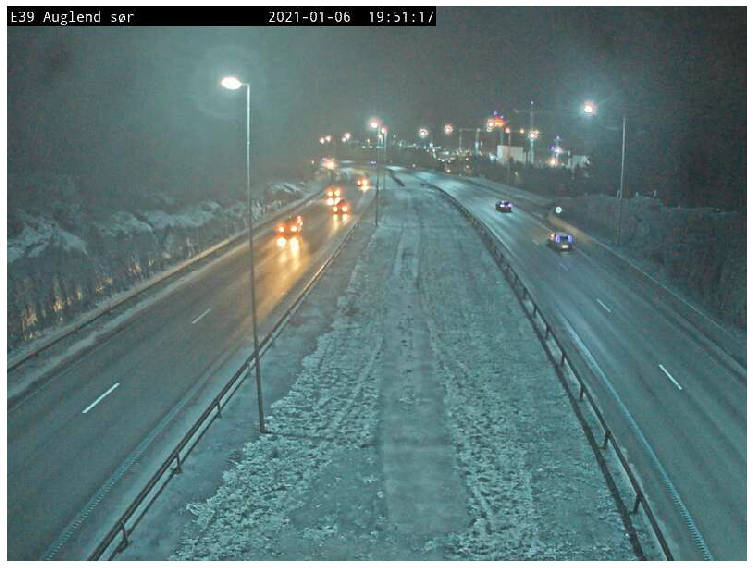

In [11]:
show_image(get_image_test(URL1))

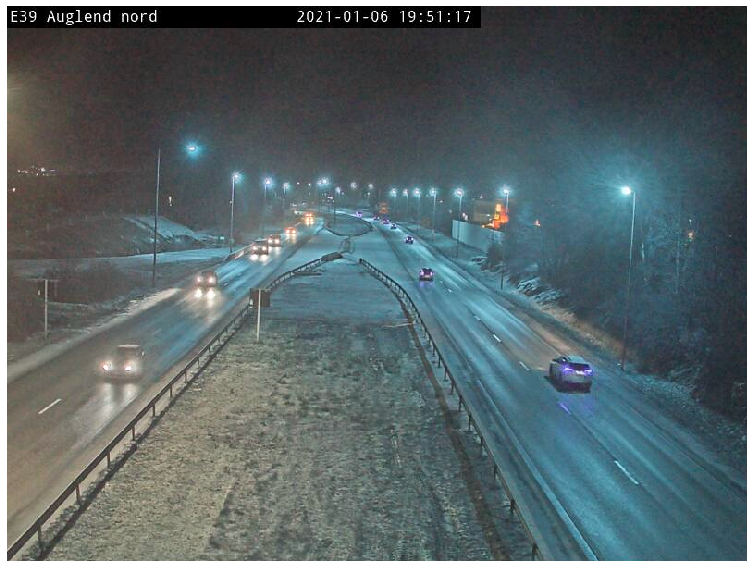

In [13]:
show_image(get_image_test(URL2))